In [3]:
from myclasses.sql_executor import SQLExecutor
import pandas as pd

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT 
            (net_income / ((total_assets + total_liabilities) * num_beds)) as roe,
            year,
            ownership,
            acct_payable,
            acct_rec,
            total_liabilities,
            tot_fund_balance,
            current_ratio,
            quick_ratio,
            pct_fixed_assets,
            pct_other_assets,
            (tot_days / tot_bed_days_avail) as fill_rate,
            cash,
            chow_last_12mos,
            region,
            state,
            state_lean,
            county_ssa,
            zip,
            tot_discharge_tot,
            def_score,
            fine_tot,
            fine_cnt,
            resfamcouncil,
            sprinkler_status,
            overall_rating,
            quality_rating,
            staffing_rating,
            rn_staffing_rating,
            aidhrd,
            vochrd,
            rnhrd,
            totlichrd,
            tothrd,
            pthrd,
            weighted_all_cycles_score,
            certification,
            snf_avg_stay_len_title_tot,
            pop_over_70,
            over_70_pct,
            has_outpatient,
            bedcert,
            fac_type,
            staff_style,
            totlichrd_to_tot
            
            
        FROM Master
        WHERE 
            roa > -1 
            AND roa < 1 
            AND total_assets > 0
            AND total_liabilities > 0 
            AND operating_income < 15000000 
            AND operating_income > -15000000
            AND year <> 2021
        ORDER BY prov_id; 
        """

    # Execute the query and get the result as a DataFrame
    df = sql_executor.execute_query(query)

In [4]:
df.describe()

,roe,year,acct_payable,acct_rec,total_liabilities,tot_fund_balance,current_ratio,quick_ratio,pct_fixed_assets,pct_other_assets,...,rnhrd,totlichrd,tothrd,pthrd,weighted_all_cycles_score,snf_avg_stay_len_title_tot,pop_over_70,over_70_pct,bedcert,totlichrd_to_tot
count,83508.000000,83508.000000,8.350800e+04,8.350800e+04,8.350800e+04,8.350800e+04,83508.000000,83508.000000,83508.000000,83508.000000,...,83508.000000,83508.000000,83508.000000,83508.000000,83079.000000,83508.000000,83508.000000,83508.000000,83508.000000,83508.000000
mean,0.031517,2018.007712,9.152653e+03,2.016906e+04,1.358839e+05,3.229564e+04,13.177715,9.528272,0.326094,0.120059,...,0.710153,1.578555,3.939265,0.088293,60.190084,2.017506,83837.282105,0.120107,0.964899,0.400391
std,0.164232,1.997265,4.464912e+04,1.087036e+05,6.485727e+05,2.822900e+05,2051.239433,1940.285829,0.564688,0.539261,...,0.395386,0.477038,0.850085,0.094548,68.586532,10.913954,168528.112710,0.030559,0.931750,0.071209
min,-2.774997,2015.000000,-2.538404e+05,-3.838471e+05,1.692434e-01,-1.005025e+07,-7359.016509,-7186.550314,-3.467757,-87.187961,...,0.000000,0.000000,1.503410,0.000000,0.000000,0.000004,139.000000,0.030065,0.000010,0.000000
25%,-0.037395,2016.000000,1.716775e+03,6.683143e+03,9.374607e+03,-2.479606e+03,0.797243,0.008713,0.079495,0.020118,...,0.462178,1.302700,3.403435,0.035680,20.800000,0.697794,6282.000000,0.099886,1.000000,0.357380
50%,0.012340,2018.000000,3.485001e+03,1.014294e+04,2.123289e+04,7.918043e+03,1.383005,0.112402,0.205265,0.061524,...,0.642130,1.508450,3.809410,0.067780,40.000000,1.179694,22944.000000,0.116642,1.000000,0.396763
75%,0.095092,2020.000000,7.177337e+03,1.513259e+04,5.803626e+04,2.750723e+04,2.574023,0.623405,0.499381,0.158603,...,0.865978,1.752730,4.327218,0.110772,74.250000,2.176170,84607.000000,0.134386,1.000000,0.439891
max,5.839199,2021.000000,3.165168e+06,7.913870e+06,3.752557e+07,1.869957e+07,554139.333333,546469.166667,79.378075,10.689216,...,8.012500,9.983330,16.326920,3.320740,1442.330000,2987.234623,953730.000000,0.446093,200.000000,1.000005


In [5]:
def bin_income(data):
    if data >= 0.02:
        return '2_profit'
    if data >= -.0:
        return '1_breakeven'
    else:
        return '0_loss'
    
df['roe'] = df['roe'].apply(bin_income)

# Make y label
y = df['roe']
df = df.drop(columns=['roe'])

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select numerical columns
quant_cols = df.select_dtypes(include=['number']).columns

# Apply scaling only to the selected numerical columns
df[quant_cols] = scaler.fit_transform(df[quant_cols])

In [7]:
df.describe()

,year,acct_payable,acct_rec,total_liabilities,tot_fund_balance,current_ratio,quick_ratio,pct_fixed_assets,pct_other_assets,fill_rate,...,rnhrd,totlichrd,tothrd,pthrd,weighted_all_cycles_score,snf_avg_stay_len_title_tot,pop_over_70,over_70_pct,bedcert,totlichrd_to_tot
count,83508.000000,83508.000000,83508.000000,83508.000000,83508.000000,83508.000000,83508.000000,83508.000000,83508.000000,83508.000000,...,83508.000000,83508.000000,83508.000000,83508.000000,83079.000000,83508.000000,83508.000000,83508.000000,83508.000000,83508.000000
mean,0.501285,0.076921,0.048690,0.003621,0.350700,0.013130,0.012997,0.045794,0.892016,0.002539,...,0.088631,0.158119,0.164324,0.026588,0.041731,0.000675,0.087772,0.216432,0.004824,0.400389
std,0.332877,0.013059,0.013100,0.017283,0.009819,0.003653,0.003504,0.006816,0.005510,0.011525,...,0.049346,0.047783,0.057347,0.028472,0.047553,0.003654,0.176730,0.073454,0.004659,0.071208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.074746,0.047065,0.000250,0.349490,0.013107,0.012980,0.042818,0.890995,0.002077,...,0.057682,0.130488,0.128176,0.010745,0.014421,0.000234,0.006442,0.167826,0.005000,0.357378
50%,0.500000,0.075263,0.047482,0.000566,0.349852,0.013108,0.012980,0.044336,0.891418,0.002443,...,0.080141,0.151097,0.155564,0.020411,0.027733,0.000395,0.023915,0.208104,0.005000,0.396761
75%,0.833333,0.076343,0.048083,0.001547,0.350533,0.013111,0.012981,0.047886,0.892410,0.002691,...,0.108078,0.175566,0.190495,0.033358,0.051479,0.000728,0.088579,0.250756,0.005000,0.439889
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


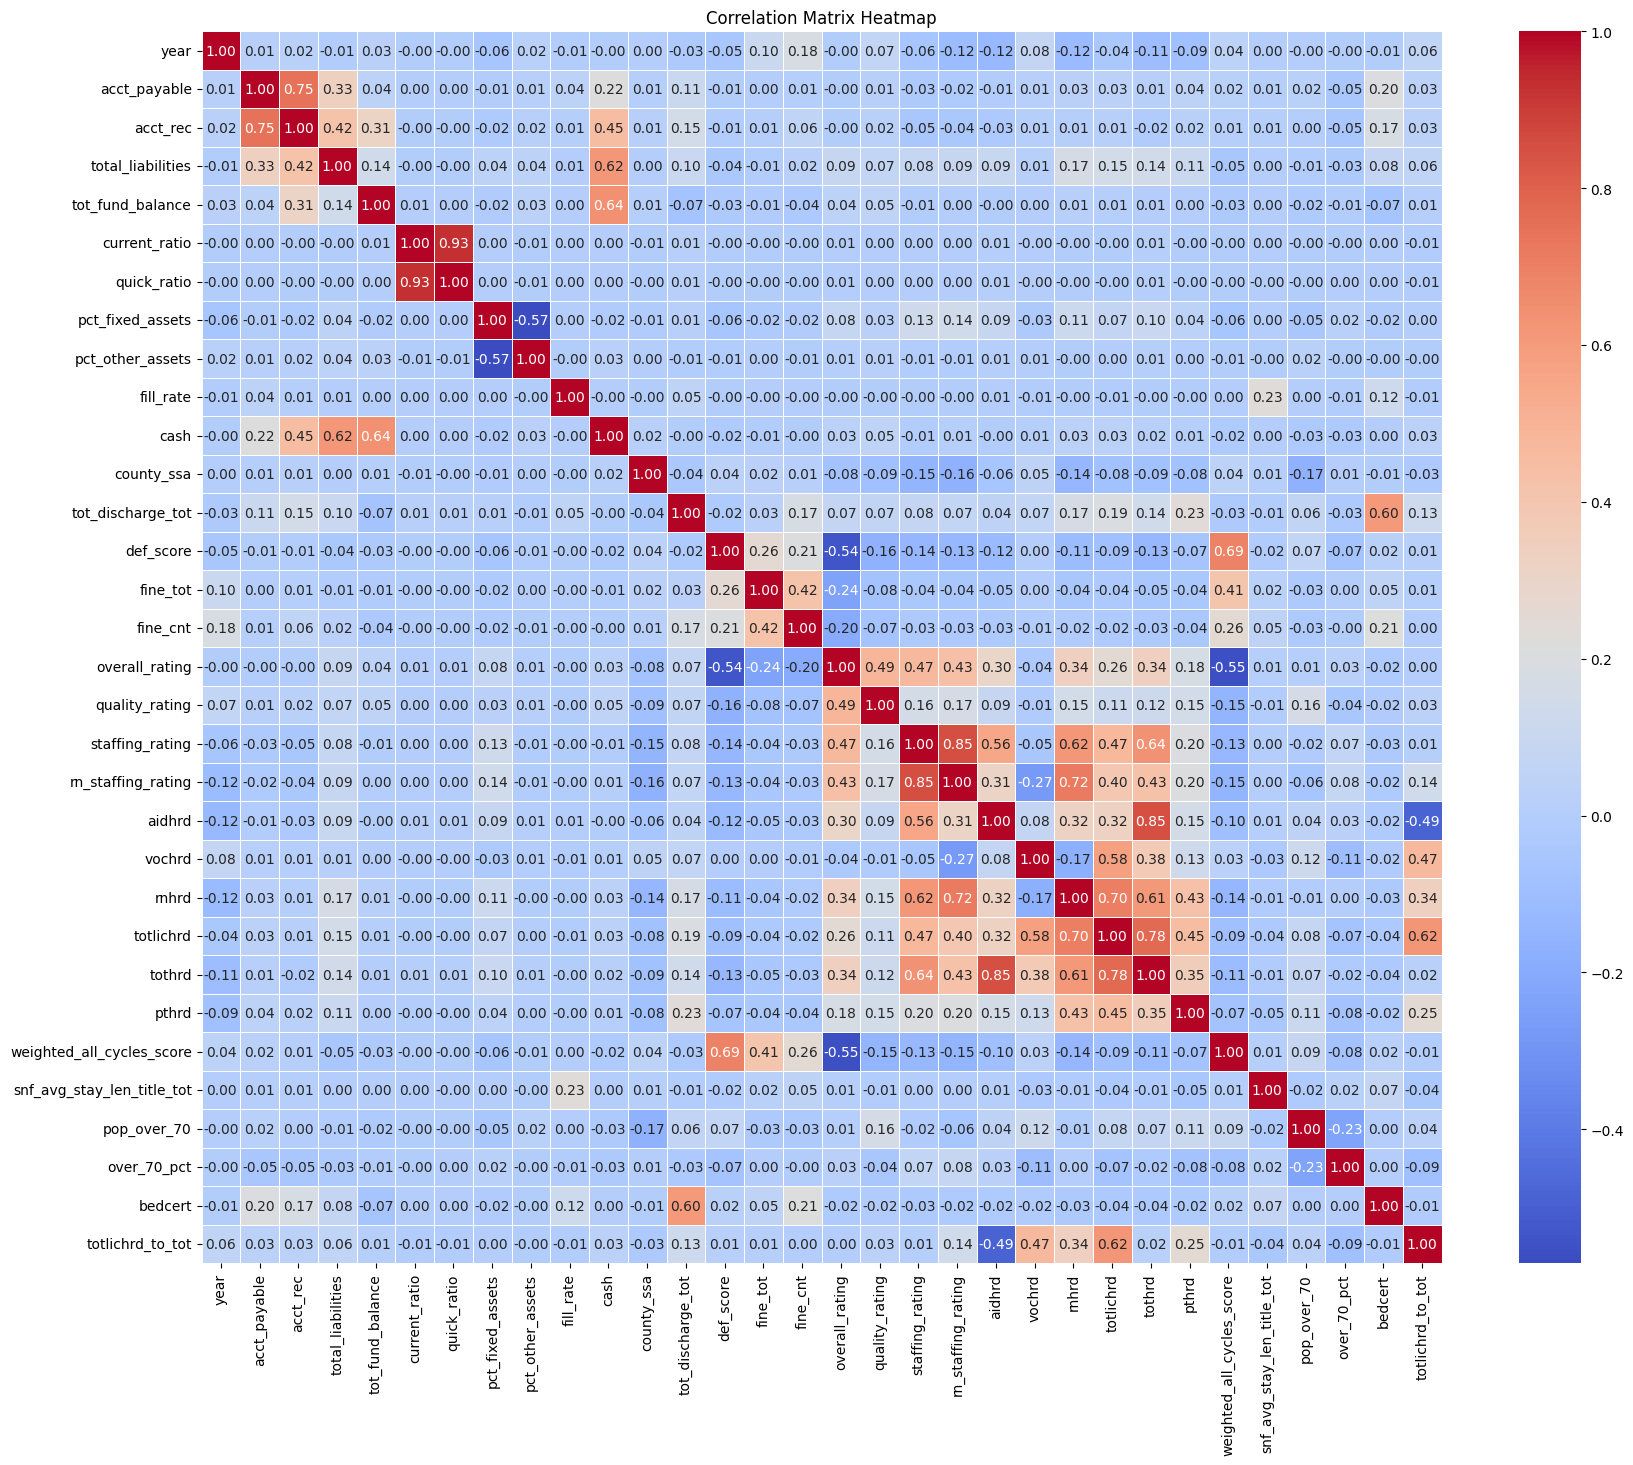

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate y and X along the columns axis
data = df.select_dtypes(include=['number'])

# Remove 0 columns
non_zero_columns = data.columns[(data != 0).any()]
data = data[non_zero_columns]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# Select columns where data type is text (object)
text_columns = df.select_dtypes(include=['object']).columns

# Create dummy variables for text columns
df_encoded = pd.get_dummies(df, columns=text_columns)

# Convert all columns to numeric type
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Set X
X = df_encoded

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=84)


In [10]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Convert class labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define XGBoost classifier and set hyperparameters for multiclass classification
xgb_model = xgb.XGBClassifier(
    booster='gbtree',
    seed=1001,
    n_estimators=10000,          # Iterations of the model
    learning_rate=0.0075,         # Speed at which the learners optimize
    max_depth=4,                # Depth of the weak learners
    min_child_weight=1, 
    device = 'cuda',    
    subsample=0.85,
    colsample_bytree=0.95,
    random_state=42,
    eval_metric='merror',         # Multiclass logloss for evaluation
    objective='multi:softlog',  # Use softmax for multiclass classification
    num_class=1,                # Number of classes in your dataset
    gamma=0.4,                 # Increasing this value will make model more conservative
    reg_alpha=0.5,             # Increasing this value will make model more conservative
    reg_lambda=0.5,            # Increasing this value will make model more conservative
    early_stopping_rounds=2500
)

# Train the model with progress printout
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],  # Evaluation set for tracking progress
    verbose=100                                       # Print progress
)

xgb_model.save_model("saved-models/xgb_classifier_model_roe.json")

[0]	validation_0-merror:0.34299	validation_1-merror:0.34789
[100]	validation_0-merror:0.33981	validation_1-merror:0.34451
[200]	validation_0-merror:0.33702	validation_1-merror:0.34086
[300]	validation_0-merror:0.33405	validation_1-merror:0.33837
[400]	validation_0-merror:0.33097	validation_1-merror:0.33637
[500]	validation_0-merror:0.32794	validation_1-merror:0.33484
[600]	validation_0-merror:0.32482	validation_1-merror:0.33259
[700]	validation_0-merror:0.32225	validation_1-merror:0.33116
[800]	validation_0-merror:0.31995	validation_1-merror:0.33047
[900]	validation_0-merror:0.31814	validation_1-merror:0.32870
[1000]	validation_0-merror:0.31614	validation_1-merror:0.32772
[1100]	validation_0-merror:0.31431	validation_1-merror:0.32640
[1200]	validation_0-merror:0.31245	validation_1-merror:0.32565
[1300]	validation_0-merror:0.31059	validation_1-merror:0.32496
[1400]	validation_0-merror:0.30898	validation_1-merror:0.32418
[1500]	validation_0-merror:0.30734	validation_1-merror:0.32308
[160

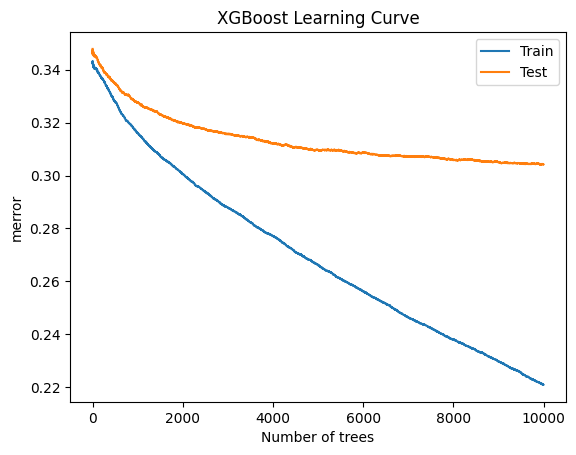

In [11]:
# Get the evaluation results
results = xgb_model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

# Plot the learning curve with multi-logloss
plt.plot(x_axis, results['validation_0']['merror'], label='Train')
plt.plot(x_axis, results['validation_1']['merror'], label='Test')
plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('merror')
plt.title('XGBoost Learning Curve')
plt.show()

/home/ehan/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:11:44] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


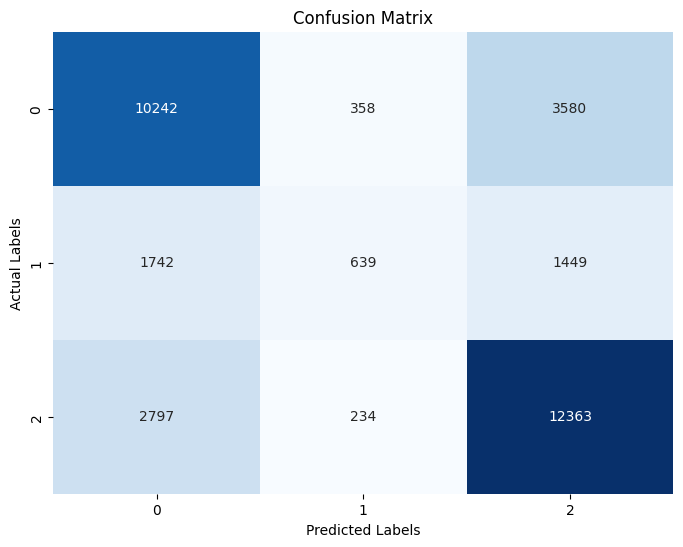

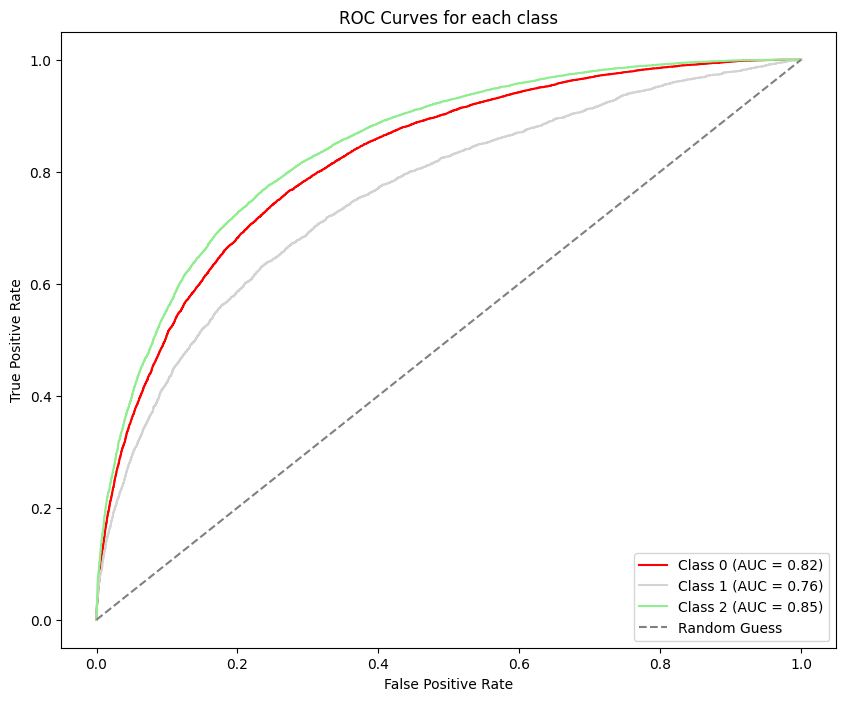

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np


# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


# Define the reddest and greenest colors
colors = ['red', 'lightgrey',  'lightgreen', 'darkgreen']
# Calculate ROC curves and AUC scores for each class
num_classes = len(np.unique(y_test))
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color= colors[i], label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for each class')
plt.legend(loc='lower right')
plt.show()

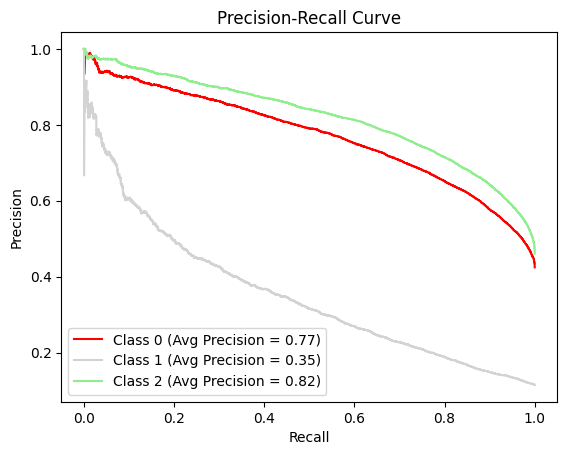

In [13]:
from sklearn.metrics import precision_recall_curve, average_precision_score


# Loop over all classes
for class_index in range(num_classes):
    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test == class_index, y_pred_proba[:, class_index])

    # Calculate average precision score
    avg_precision = average_precision_score(y_test == class_index, y_pred_proba[:, class_index])

    # Plot precision-recall curve with specified color
    plt.plot(recall, precision, color=colors[class_index], label=f'Class {class_index} (Avg Precision = {avg_precision:.2f})')

# Set labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print("----------------------")
print(class_report)

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.69      0.72      0.71     14180
           1       0.52      0.17      0.25      3830
           2       0.71      0.80      0.75     15394

    accuracy                           0.70     33404
   macro avg       0.64      0.56      0.57     33404
weighted avg       0.68      0.70      0.68     33404



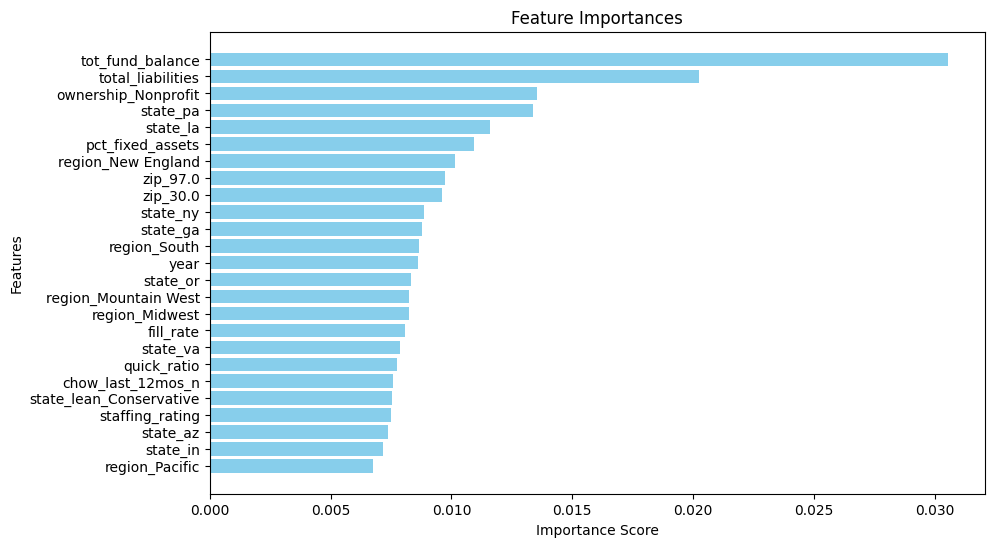

In [15]:
# Assuming xgb_model is your trained XGBoost model
feature_importance = xgb_model.feature_importances_

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importance))

# Sort feature importance dictionary by importance score
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importance scores
features = [f[0] for f in sorted_features[:25]]
importance_scores = [f[1] for f in sorted_features[:25]]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importance_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()